# Przegląd metod redukcji wymiarów w danych wielowymiarowych wraz z prezentacją i wizualizacją ich działania

### Cel projektu: celem projektu jest dokonanie przeglądu i implementacji wybranych metod redukcji wymiarów dla danych wielowymiarowych (np. PCA, t-SNE, UMAP). Aplikacja powinna umożliwiać wczytywanie danych, przeprowadzanie redukcji wymiarów oraz wizualizację wyników (np. w 2D lub 3D), a także porównanie efektywności poszczególnych metod.

##### Importowanie bibliotek

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll, fetch_openml, make_blobs, fetch_covtype
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.utils import resample
import openml
import time
from tqdm.notebook import tqdm

In [12]:
plt.style.use('dark_background')
scaler = StandardScaler()

import warnings
warnings.filterwarnings('ignore')

##### Swiss Roll - wykres 3D

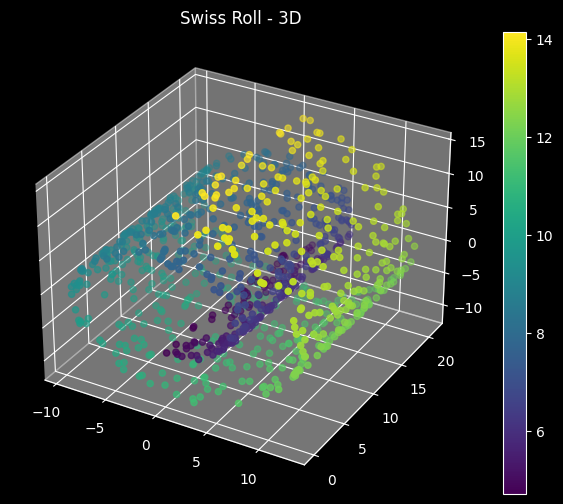

In [13]:
X_swiss, y_swiss = make_swiss_roll(n_samples=1000, noise=0.05)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(X_swiss[:,0], X_swiss[:,1], X_swiss[:,2], c=y_swiss, cmap=plt.cm.viridis)
fig.colorbar(p, ax=ax)
ax.set_title("Swiss Roll - 3D")
plt.show()

##### PCA - Swiss Roll i pomiar czasu

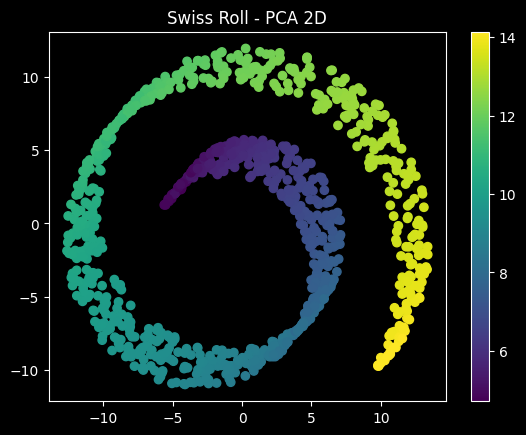

Czas wykonania PCA: 0.00079 sekundy


In [14]:
pca_swiss = PCA(n_components=2)
start_pca_swiss = time.perf_counter()
X_pca_swiss = pca_swiss.fit_transform(X_swiss)
end_pca_swiss = time.perf_counter()

plt.scatter(X_pca_swiss[:,0], X_pca_swiss[:,1], c=y_swiss, cmap=plt.cm.viridis)
plt.title("Swiss Roll - PCA 2D")
plt.colorbar()
plt.show()

print(f"Czas wykonania PCA: {end_pca_swiss - start_pca_swiss:.5f} sekundy")

##### t-SNE - Swiss Roll i pomiar czasu

/Users/klaudiaszczepocka/Desktop/IiMS/IiM-Temat6/iims/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/klaudiaszczepocka/Desktop/IiMS/IiM-Temat6/iims/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/klaudiaszczepocka/Desktop/IiMS/IiM-Temat6/iims/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/klaudiaszczepocka/Desktop/IiMS/IiM-Temat6/iims/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/klaudiaszczepocka/Desktop/IiMS/IiM-Temat6/iims/lib/python3.9/site-packages/sklearn/manifold/_

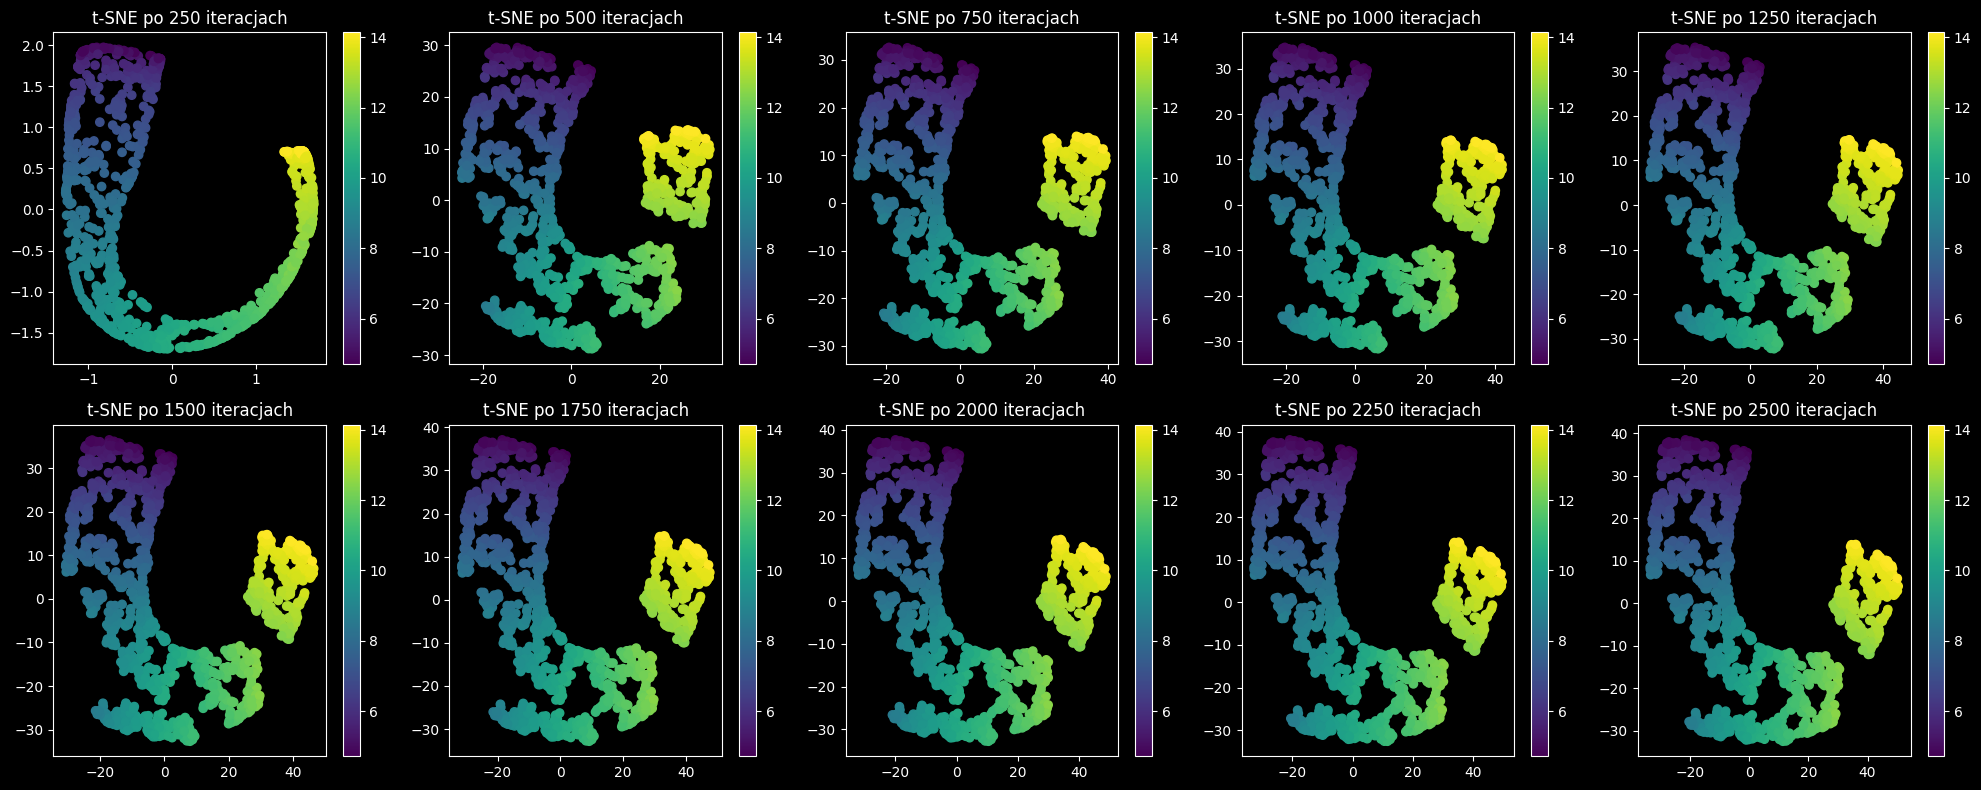

In [15]:
tsne_swiss = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30, random_state=42, n_iter=250)
start_tsne_swiss = time.perf_counter()
X_tsne_swiss_iter = tsne_swiss.fit_transform(X_swiss)
end_tsne_swiss = time.perf_counter()

fig, axes = plt.subplots(2, 5, figsize=(20, 8))

for i in range(1, 11):
    tsne_temp = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30, random_state=42, n_iter=i * 250)
    X_tsne_swiss = tsne_temp.fit_transform(X_swiss)

    ax = axes[(i-1) // 5, (i-1) % 5]
    scatter = ax.scatter(X_tsne_swiss[:, 0], X_tsne_swiss[:, 1], c=y_swiss, cmap=plt.cm.viridis)
    ax.set_title(f"t-SNE po {i * 250} iteracjach")
    fig.colorbar(scatter, ax=ax)

plt.tight_layout()
plt.show()